In [1]:
import numpy as np

In [4]:
np.ones(1)

np.float64(1.0)

In [5]:
import numpy as np

def softmax(x):
    """
    Compute softmax for a 1D array.
    x: numpy array of shape (n,)
    """
    # Numerical stability trick: subtract max
    x_max = np.max(x)
    e_x = np.exp(x - x_max)
    return e_x / e_x.sum()

# Example
x = np.array([2.0, 1.0, 0.1])
print("Softmax (plain):", softmax(x))


Softmax (plain): [0.65900114 0.24243297 0.09856589]


In [8]:
def softmax(x):
    x_max = np.max(x, axis =1, keepdims= True)
    e_x = np.exp(x - x_max)
    return e_x / e_x.sum(axis = 1, keepdims=True)
    

In [9]:
X = np.array([[2.0, 1.0, 0.1],
              [1.0, 3.0, 0.2]])
print("Softmax (batch):\n", softmax(X))


Softmax (batch):
 [[0.65900114 0.24243297 0.09856589]
 [0.11314284 0.8360188  0.05083836]]


In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [17]:
sigmoid(X)

array([[0.88079708, 0.73105858, 0.52497919],
       [0.73105858, 0.95257413, 0.549834  ]])

In [17]:
def mat_mul(X, Y):
    if len(X[0]) != len(Y):
        return "Shape is not correct"
    res = [[0] * len(Y[0]) for _ in range(len(X))]

    for i in range(len(X)):
        for j in range(len(Y[0])):
            row = X[i]
            col = [y_[j] for y_ in Y]
            res[i][j] = sum([r * c for r, c in zip(row, col)])

    return res
        
        

In [18]:
X = [[1,2,3],
    [4,5,6]]

In [28]:
Y = [[2,4],
    [5,4],
    [6,7]]

In [29]:
mat_mul(X,Y)

[[30, 33], [69, 78]]

In [30]:
np.dot(X, Y)

array([[30, 33],
       [69, 78]])

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()

In [3]:
X, y = data.data, data.target

In [27]:
Y = y.reshape(-1, 1)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import numpy as np

In [8]:
num_features = X.shape[1]

prev = num_features

layers = [8,8,4,4,1]

weights = {}
bias = {}

for i in range(len(layers)):
    weights[f"W{i}"] = np.random.randn(layers[i], prev)
    bias[f"b{i}"] = np.zeros((layers[i],1))
    prev = layers[i]
    

In [11]:
weights, bias

({'W0': array([[ 2.39617654e-02,  1.04517654e+00,  1.21425186e+00,
          -6.62922449e-02,  5.93246397e-01, -1.36333896e-01,
           2.76668334e-01,  4.12720062e-01,  5.87042729e-01,
          -3.56449194e-01,  9.63803165e-01,  9.30997746e-01,
           7.74722351e-01,  1.14074915e+00, -1.00814895e+00,
          -2.39571860e-01, -5.03607589e-01, -1.42935020e-01,
           8.73922520e-01, -1.56776365e+00,  1.33280379e+00,
          -1.58802164e+00, -2.28910593e-01,  6.32834173e-01,
           1.25780785e-03, -1.08924650e+00,  1.04550692e+00,
          -7.60798331e-01, -7.38821626e-01, -1.63517638e-01],
         [ 1.64598818e+00, -2.35649322e-01, -1.27881022e+00,
           1.46465242e+00, -1.07509912e-02,  9.98231402e-01,
          -4.34804420e-02, -1.18498444e+00,  1.42419381e+00,
           2.75431343e-01, -3.19211737e-01, -1.93808236e-01,
           1.13837534e+00,  8.78298394e-01, -7.31380138e-01,
           1.19397858e+00,  7.69723575e-01,  5.92682688e-01,
          -1.2568

In [14]:
def relu(x):
    return np.maximum(x, 0)

def relu_derivative(x):
    return (x > 0).astype(float)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def derivative_sigmoid(a):
    return a * (1 - a)

In [30]:
def forward(X):
    cache = {}
    A = X
    cache[f"A{-1}"] =  A

    for i in range(len(layers)-1):
        Z = np.dot(weights[f"W{i}"], A) + bias[f"b{i}"]
        A = relu(Z)
        cache[f"A{i}"] = A
        cache[f"Z{i}"] = Z

    l = len(layers) - 1
    Z = np.dot(weights[f"W{l}"], A) + bias[f"b{l}"]
    A = relu(Z)
    cache[f"Z{l}"] = Z
    cache[f"A{l}"] = A

    return cache, A

    

In [31]:
c, y_pred = forward(X.T)

In [32]:
y_pred.shape

(1, 569)

In [35]:
def backward(cache, Y):
    grad = {}
    m = Y.shape[1]
    l = len(layers) - 1

    dZ = cache[f"A{l}"] - Y
    grad[f"dW{l}"] = (1/ m) * np.dot(dZ, cache[f"A{l-1}"].T)
    grad[f"db{l}"] = (1/m) * np.sum(dZ, axis = 1, keepdims = True)
    dA = np.dot(weights[f"W{l}"].T, dZ)
    
    
    for i in reversed(range(l)):
        dZ = dA * relu_derivative(cache[f"Z{i}"])
        grad[f"dW{i}"] = (1/m) * np.dot(dZ, cache[f"A{i-1}"].T)
        grad[f"db{i}"] = (1/m) * np.sum(dZ, axis = 1, keepdims = True)
        dA = np.dot(weights[f"W{i}"].T, dZ)

    return grad
        

In [36]:
grad = backward(c, Y.T)

In [40]:
def update_weights(grad, learning_rate = 0.001):

    for i in range(len(layers)):
        weights[f"W{i}"] -= learning_rate * grad[f"dW{i}"]
        bias[f"b{i}"] -= learning_rate * grad[f"db{i}"]

    

In [42]:
def cal_loss(y_pred, y):
    loss = y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)
    return - np.mean(loss)

In [41]:
update_weights(grad)

In [44]:
for i in range(100):
    cache, y_pred = forward(X.T)
    loss = cal_loss(y_pred.T, Y)
    grads = backward(cache, Y.T)
    update_weights(grads)
    if i % 10 == 0:
        print(loss)

4.626740473692787
3.1277304617259127
2.7274810156642113
2.488565508717266
2.318576450084654
2.187053620109497
2.080114804611558
1.9902541270797958
1.912950728749575
1.8452696556459134


In [46]:
from sklearn.datasets import load_iris

In [47]:
data = load_iris()

In [48]:
X, y = data.data, data.target

In [60]:
X = torch.tensor(X, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.long)

In [53]:
np.unique(y)

array([0, 1, 2])

In [61]:
X[0], y[0]

(tensor([5.1000, 3.5000, 1.4000, 0.2000]), tensor(0))

In [50]:
from torch import nn
import torch

In [55]:
class CLFModel(nn.Module):
    def __init__(self, in_features, out_features, hidden_dim = 32):
        super().__init__()
        self.layer1 = nn.Linear(in_features, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim //2)
        self.layer3 = nn.Linear(hidden_dim//2, out_features)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(self.relu(x))
        x = self.layer3(self.relu(x))
        return x

In [56]:
model = CLFModel(X.shape[1],3)

In [57]:
criterion = nn.CrossEntropyLoss()

In [58]:
optimizer = torch.optim.Adam(params = model.parameters(), lr = 0.001)

In [63]:
for i in range(100):
    model.train()
    y_pred = model(X)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 10== 0:
        print(loss.item())

1.1138439178466797
1.0471807718276978
1.0025290250778198
0.9487051367759705
0.8882305026054382
0.8205451965332031
0.7496611475944519
0.6799711585044861
0.6164596080780029
0.5621998906135559


In [68]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [69]:
train_data = datasets.FashionMNIST(root = "data",train = True, transform = ToTensor())

In [70]:
test_data = datasets.FashionMNIST(root = "data", train = False, transform = ToTensor())

In [73]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [74]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [75]:
from torch.utils.data import DataLoader

In [76]:
train_data = DataLoader(train_data, batch_size =32, shuffle = True)
test_data = DataLoader(test_data, batch_size =32 , shuffle= True)

In [78]:
for x,y in train_data:
    print(x)
    print(y)
    break

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

In [90]:
class CNNModel(nn.Module):
    def __init__(self, in_channels, out_features, hidden_channels = 32):
        super().__init__()
        self.c1 = nn.Conv2d(in_channels, hidden_channels, kernel_size = (3,3), stride = 1)
        self.c2 = nn.Conv2d(hidden_channels, hidden_channels, kernel_size = (3,3), stride = 1)
        self.c3 = nn.Conv2d(hidden_channels, hidden_channels, kernel_size = (3,3), stride = 1)
        self.max_pool = nn.MaxPool2d(kernel_size = (2,2))
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(hidden_channels * 11 * 11, out_features)

    def forward(self, x):
        x = self.c1(x)
        x = self.c2(self.relu(x))
        x = self.c3(self.relu(x))
        x = self.max_pool(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x

In [91]:
model = CNNModel(1,10)

In [92]:
criterion = nn.CrossEntropyLoss()

In [93]:
optimizer = torch.optim.Adam(params = model.parameters(), lr = 0.001)

In [94]:
for i in range(2):
    model.train()
    overall_loss = 0
    for x, y in train_data:
        y_pred = model(x)
        loss = criterion(y_pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        overall_loss += loss.item()
    
    print(loss)

tensor(0.3117, grad_fn=<NllLossBackward0>)
tensor(0.3232, grad_fn=<NllLossBackward0>)


In [99]:
overall_loss / len(train_data)

0.2759738175084194

In [100]:
from collections import Counter

In [101]:
from torch.utils.data import DataLoader, Dataset

In [103]:
texts = [
    "I love this product",
    "This is amazing",
    "Very happy with the service",
    "I hate this",
    "This is terrible",
    "Very disappointed",
    "Absolutely fantastic experience",
    "Worst purchase ever",
    "I am satisfied",
    "Not good at all"
]

labels = [
    1,  # I love this product
    1,  # This is amazing
    1,  # Very happy with the service
    0,  # I hate this
    0,  # This is terrible
    0,  # Very disappointed
    1,  # Absolutely fantastic experience
    0,  # Worst purchase ever
    1,  # I am satisfied
    0   # Not good at all
]


In [149]:
class NLPDataset(Dataset):

    def __init__(self, data, label, vocab_size = 20, max_seq_len = 7):
        self.data = data
        self.label = label 
        self.vocab_size = vocab_size
        self.max_seq_len = max_seq_len
        self.vocab = self.get_vocabulary(data)

    def get_vocabulary(self,texts):
        texts = " ".join(texts)
        texts = texts.split(" ")
        counter = Counter(texts)
        most_common = counter.most_common(self.vocab_size)
        vocab = {k[0]:i +1  for idx, k in enumerate(most_common)}
        vocab["UNK"] = 0
        return vocab

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        data = [self.vocab.get(ch, 0) for ch in self.data[idx].split(" ")]
        label = self.label[idx]
        if len(data) < self.max_seq_len:
            data += [0] * (self.max_seq_len - len(data))
        else:
            data = data[:self.max_seq_len]
        return torch.tensor(data), torch.tensor(label)

In [150]:
train_data = NLPDataset(texts, labels)

In [151]:
train_dataloader = DataLoader(train_data, batch_size = 8, shuffle = True)

In [157]:
class RNNModel(nn.Module):
    def __init__(self,embedding_dim = 28, vocab_size = 20, hidden_dims=16):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dims, num_layers = 2, batch_first = True)
        self.fc = nn.Linear(hidden_dims, 2)

    def forward(self, x):
        x = self.embedding(x)
        x_out, hidden = self.rnn(x)
        x = self.fc(hidden[-1])
        return x

In [158]:
model = RNNModel()

In [159]:
criterion = nn.CrossEntropyLoss()

In [160]:
optimizer = torch.optim.Adam(params = model.parameters(), lr= 0.001)

In [161]:
for i in range(10):
    model.train()
    for x, y in train_dataloader:
        y_pred = model(x)

        loss = criterion(y_pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(loss.item())
    

0.6978479623794556
0.6936410665512085
0.6937158107757568
0.7563157081604004
0.6940425634384155
0.6909976005554199
0.682844877243042
0.660158634185791
0.6925950050354004
0.6882671117782593


That’s a big request 🙂 — Pandas has **hundreds of functions**, so the most useful way is a **well-organized cheat sheet** of the **most commonly used and important ones**, grouped by task.

Below is a **practical, real-world Pandas function guide** covering ~95% of daily usage.

---

# 📊 Pandas – Most Useful Functions (Cheat Sheet)

## 1️⃣ Creating Data

```python
import pandas as pd
```

### From files

```python
pd.read_csv()
pd.read_excel()
pd.read_json()
pd.read_sql()
pd.read_parquet()
```

### From Python objects

```python
pd.DataFrame()
pd.Series()
pd.concat()
pd.merge()
```

---

## 2️⃣ Inspecting Data

```python
df.head()
df.tail()
df.sample()
df.info()
df.describe()
df.shape
df.columns
df.index
df.dtypes
```

---

## 3️⃣ Selecting & Indexing Data

### Columns

```python
df['col']
df[['col1', 'col2']]
df.filter()
```

### Rows

```python
df.loc[]
df.iloc[]
df.at[]
df.iat[]
```

### Boolean filtering

```python
df[df['age'] > 30]
df.query("age > 30")
df.where()
df.mask()
```

---

## 4️⃣ Modifying Data

```python
df.assign()
df.rename()
df.drop()
df.set_index()
df.reset_index()
df.sort_values()
df.sort_index()
```

---

## 5️⃣ Handling Missing Data

```python
df.isna()
df.notna()
df.dropna()
df.fillna()
df.interpolate()
```

---

## 6️⃣ Data Type Conversion

```python
df.astype()
pd.to_datetime()
pd.to_numeric()
pd.to_timedelta()
```

---

## 7️⃣ String Operations (`.str`)

```python
df['col'].str.lower()
df['col'].str.upper()
df['col'].str.strip()
df['col'].str.replace()
df['col'].str.contains()
df['col'].str.split()
df['col'].str.extract()
```

---

## 8️⃣ Numeric Operations

```python
df.sum()
df.mean()
df.median()
df.min()
df.max()
df.std()
df.var()
df.count()
df.quantile()
```

---

## 9️⃣ Applying Functions

```python
df.apply()
df.applymap()
df.map()
df.transform()
df.pipe()
```

---

## 🔟 Grouping & Aggregation

```python
df.groupby()
df.agg()
df.transform()
df.value_counts()
df.nunique()
```

Example:

```python
df.groupby('department')['salary'].mean()
```

---

## 1️⃣1️⃣ Merging & Joining

```python
pd.merge()
df.join()
pd.concat()
```

---

## 1️⃣2️⃣ Sorting & Ranking

```python
df.sort_values()
df.sort_index()
df.rank()
df.nlargest()
df.nsmallest()
```

---

## 1️⃣3️⃣ Duplicates

```python
df.duplicated()
df.drop_duplicates()
```

---

## 1️⃣4️⃣ Date & Time (`.dt`)

```python
df['date'].dt.year
df['date'].dt.month
df['date'].dt.day
df['date'].dt.weekday
df['date'].dt.strftime()
```

---

## 1️⃣5️⃣ Categorical Data

```python
df.astype('category')
df['col'].cat.categories
df['col'].cat.codes
df['col'].cat.rename_categories()
```

---

## 1️⃣6️⃣ Reshaping Data

```python
df.pivot()
df.pivot_table()
df.melt()
df.stack()
df.unstack()
```

---

## 1️⃣7️⃣ Window / Rolling Operations

```python
df.rolling()
df.expanding()
df.ewm()
```

Example:

```python
df['sales'].rolling(7).mean()
```

---

## 1️⃣8️⃣ Exporting Data

```python
df.to_csv()
df.to_excel()
df.to_json()
df.to_sql()
df.to_parquet()
```

---

## 1️⃣9️⃣ Performance & Utilities

```python
df.copy()
df.memory_usage()
df.equals()
df.compare()
```

---

## 2️⃣0️⃣ Series-Specific Functions

```python
s.value_counts()
s.unique()
s.nunique()
s.idxmax()
s.idxmin()
```

---

# ✅ Most Important Functions to Master First

If you want **80/20 mastery**, focus on:

```
read_csv
head / info / describe
loc / iloc
groupby
merge / concat
apply
fillna / dropna
sort_values
value_counts
pivot_table
```

---

If you want, I can:

* 🔥 Make a **one-page PDF cheat sheet**
* 🧠 Explain **each function with examples**
* 📈 Show **real data analysis workflows**
* 🎯 Create **interview-focused Pandas questions**
* ⚡ Give **performance tips for large datasets**

Just tell me 👍


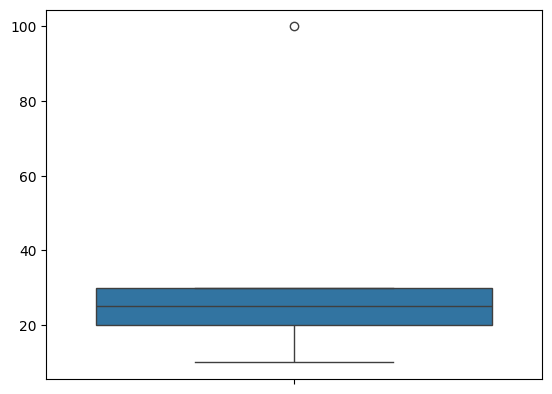

In [162]:
import seaborn as sns


import matplotlib.pyplot as plt

sns.boxplot(y=[10, 20, 25, 30, 100])
plt.show()


# sns.boxplot(x='gender', y='salary', data=df)





In [164]:
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint

In [176]:
from langchain_community.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings

In [177]:
jp_morgan_passages = [
    "JPMorgan Chase & Co. is one of the largest and most influential financial institutions in the world. Headquartered in New York City, it provides a wide range of financial services to consumers, businesses, and governments across many countries.",

    "The company’s roots trace back more than 200 years, combining the histories of several major banks, including J.P. Morgan & Co., Chase Manhattan Bank, and Bank One. These mergers helped shape JPMorgan Chase into a global banking powerhouse.",

    "J.P. Morgan, a prominent financier in the late 19th and early 20th centuries, played a critical role in stabilizing the U.S. financial system. His legacy continues to influence the firm’s culture and reputation for financial leadership.",

    "JPMorgan Chase offers services such as consumer banking, credit cards, mortgages, investment banking, asset management, and commercial banking. Its diverse offerings allow it to serve individuals as well as large corporations.",

    "The company operates in more than 100 markets worldwide. This global reach enables JPMorgan Chase to support international trade, investment, and economic development.",

    "Jamie Dimon, the long-time CEO, is one of the most well-known leaders in the banking industry. Under his leadership, the company has grown significantly and maintained stability during financial crises.",

    "JPMorgan Chase invests heavily in technology, including digital banking platforms, cybersecurity, and artificial intelligence. These investments help improve customer experience and operational efficiency.",

    "As a major financial institution, JPMorgan Chase plays a key role in the global economy. It provides capital to businesses, helps governments raise funds, and supports everyday financial needs for millions of customers.",

    "The company is involved in initiatives related to sustainability, affordable housing, workforce development, and community growth. These efforts aim to create long-term positive impact beyond profits.",

    "JPMorgan Chase is widely regarded as a leader in the banking industry. Its size, financial strength, and expertise give it significant influence over global financial markets and economic trends."
]


In [178]:
from langchain_core.documents import Document

In [179]:
docs = []
for passage in jp_morgan_passages:
    docs.append(Document(page_content = passage))
    

In [180]:
docs[0]

Document(metadata={}, page_content='JPMorgan Chase & Co. is one of the largest and most influential financial institutions in the world. Headquartered in New York City, it provides a wide range of financial services to consumers, businesses, and governments across many countries.')

In [181]:
vector_db = FAISS.from_documents(docs, HuggingFaceEmbeddings())

In [182]:
vector_db.similarity_search("what jp morgan does", k =2)

[Document(id='563228d8-7dde-4105-bea8-7d9e2aed3aec', metadata={}, page_content='As a major financial institution, JPMorgan Chase plays a key role in the global economy. It provides capital to businesses, helps governments raise funds, and supports everyday financial needs for millions of customers.'),
 Document(id='c69d6684-7ce1-43ec-a959-e5474e781c52', metadata={}, page_content='JPMorgan Chase offers services such as consumer banking, credit cards, mortgages, investment banking, asset management, and commercial banking. Its diverse offerings allow it to serve individuals as well as large corporations.')]

In [220]:
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint

llm = HuggingFaceEndpoint(
    repo_id="deepseek-ai/DeepSeek-R1-0528",
    task="text-generation",
    max_new_tokens=512,
    do_sample=False,
    repetition_penalty=1.03,
    provider="auto",  # let Hugging Face choose the best provider for you
)

chat_model = ChatHuggingFace(llm=llm)

In [221]:
from langchain.tools import tool

In [222]:
@tool
def retrieve_information(query: str):
    """Retreive information about the JP Morgan

    Args:
        query(str): Qeury about the jp Morgan Chase
    """
    return vector_db.similarity_search(query, k = 2)
    

In [223]:
llm_with_tool = chat_model.bind_tools([retrieve_information])

In [250]:
def agent(messages):
    res = llm_with_tool.invoke(messages)
    if res.tool_calls:
        print(res.tool_calls)
        messages.append(res)
        tool_res = retrieve_information.invoke(res.tool_calls[0].get("args", {}))
        messages.append(ToolMessage(content= f"{tool_res}", tool_call_id = res.tool_calls[0].get("id")))
        return agent(messages)
    else:
        messages.append(res)
        return messages 
        

In [251]:
from langchain_core.messages import HumanMessage, AIMessage, ToolMessage

In [252]:
messages = agent([HumanMessage(content = "what jp morgan do")])

[{'name': 'retrieve_information', 'args': {'query': 'what does J.P. Morgan do'}, 'id': 'call_tpg8feve4vkwg08kg67q6jzd', 'type': 'tool_call'}]


In [253]:
messages

[HumanMessage(content='what jp morgan do', additional_kwargs={}, response_metadata={}),
 AIMessage(content='<think>\nWe are given a question: "what jp morgan do"\n We are to use the function retrieve_information to get the answer.\n The function requires a query string. We can use the question as the query.\n However, note that the question is about what J.P. Morgan does. We can rephrase the query to be more specific if needed, but the original question is clear.\n Let\'s call the function with the query: "what does J.P. Morgan do?"\n</think>\n\nI\'ll help you understand what J.P. Morgan does. Let me look up the information for you.', additional_kwargs={'tool_calls': [{'function': {'arguments': '{"query": "what does J.P. Morgan do"}', 'name': 'retrieve_information', 'description': None}, 'id': 'call_tpg8feve4vkwg08kg67q6jzd', 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 147, 'prompt_tokens': 132, 'total_tokens': 279}, 'model_name': 'deepseek-ai/DeepSee

In [254]:
messages[-1].pretty_print()

================================== Ai Message ==================================

<think>
We have retrieved two documents that provide information about what J.P. Morgan does.

First document: 
"J.P. Morgan, a prominent financier in the late 19th and early 20th centuries, played a critical role in stabilizing the U.S. financial system. His legacy continues to influence the firm’s culture and reputation for financial leadership."

Second document:
"As a major financial institution, JPMorgan Chase plays a key role in the global economy. It provides capital to businesses, helps governments raise funds, and supports everyday financial needs for millions of customers."

The question is about what J.P. Morgan does. The first document talks about the historical figure J.P. Morgan and his legacy. The second document talks about the current institution JPMorgan Chase (which is the modern firm that carries the name).

Given the context, the user is likely asking about the company J.P. Morgan (i.